# U.S. Medical Insurance Costs
In this project, I am going to be analyzing the medical insurance costs that occur in the US. I will analyze the differences in insurance costs using different variables such as gender, location, age, smoker status and their bmi's.
I will be using a csv file that I will link at the bottom of this project. 
~Ayonika Bose 

In [123]:
#Importing the insurance.csv file into the notebook
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("/Users/ayonikabose/Documents/GitHub/US Medical Insurance Costs /python-portfolio-project-starter-files")
data = pd.read_csv("insurance.csv")
df = pd.DataFrame(data, index = None)

In [124]:
#To get an intital idea of what the data is, I printed out the csv onto the notebook. The data obviously is not
#organized which will be our next steps.
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [125]:
rows = len(df.axes[0])
cols = len(df.axes[1])

print("There are " + str(rows) + " rows and " + str(cols) + " columns in the data")



There are 1338 rows and 7 columns in the data


In [126]:
#Create empty lists for the various attributes in insurance.csv
age = []
sex = []
bmi = []
num_of_children = []
smoker_status = []
region = []
insurance_charge = []

In [127]:
# I am defining insurance_list as a function here to loop through the columns to create clean and organized lists. 
def insurance_list(lst, csv_file, column_name):
    # open csv file
    with open("insurance.csv") as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst
    

In [128]:
# Now the data is put into its respective columns. 
insurance_list(age, 'insurance.csv', 'age')
insurance_list(sex, 'insurance.csv', 'sex')
insurance_list(bmi, 'insurance.csv', 'bmi')
insurance_list(num_of_children, 'insurance.csv', 'children')
insurance_list(smoker_status, 'insurance.csv', 'smoker')
insurance_list(region, 'insurance.csv', 'region')
insurance_list(insurance_charge, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

Text(3.674999999999997, 0.5, 'Frequency of Individuals')

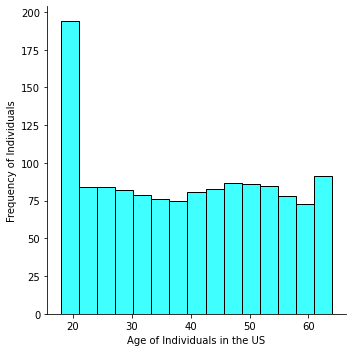

In [129]:
sns.displot(df['age'],kde=False,bins=15,color="cyan")
plt.xlabel('Age of Individuals in the US')
plt.ylabel('Frequency of Individuals')

This is a histogram that helps us understand the age frequency of individuals with medical insurance costs in the US. Even though there seems to be a higher younger demographic visiting the hospital, I will use further analysis to figure out which age bracket pays more insurance cost. 


<AxesSubplot:xlabel='age', ylabel='smoker'>

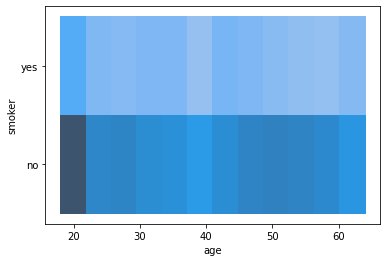

In [130]:
sns.histplot(data=data, x="age", y= "smoker", shrink=.8)

When I saw the previous graph, I wanted to investigate if younger individuals went to the hospital more frequently because they were active smokers, however, according to this density plot, we can annotate that it is actually the complete opposite. 20 year olds have the highest non-smokers than any other age group. 


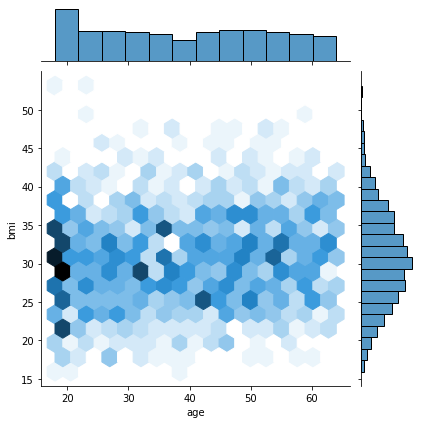

In [131]:
sns.jointplot(x=df["age"], y=df["bmi"], kind='hex')

This is a hex graph plotting age on the X-Axis, and bmi on the Y-Axis. On the first look, we can see younger individuals within the 20 years age bracket seem to have a higher average BMI than older age brackets. BMI may be a contributing factor to more frequent visits to the hospital for 20 year olds. 

In [148]:
# Adding this variable to create a column to put ages into respective buckets. 
ages = pd.DataFrame(data, columns=['age'])

bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
ages['age-range'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)
data = ages
class PatientsInfo:
    # init method that takes in each list parameter
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children, 
                 patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges

    # method that calculates the average ages of the patients in insurance.csv
    def analyze_ages(self):
        # initialize total age at zero
        total_age = 0
        # iterate through all ages in the ages list
        for age in self.patients_ages:
            # sum of the total age
            total_age += int(age)
        # return total age divided by the length of the patient list
        return ("Average Patient Age: " + str(round(total_age/len(self.patients_ages), 2)) + " years")

    # method that calculates the number of males and females in insurance.csv
    def analyze_sexes(self):
        # initialize number of males and females to zero
        females = 0
        males = 0
        # iterate through each sex in the sexes list
        for sex in self.patients_sexes:
            # if female add to female variable
            if sex == 'female':
                females += 1
            # if male add to male variable
            elif sex == 'male':
                males += 1
        # print out the number of each
        print("Count for female: ", females)
        print("Count for male: ", males)

    # method to find each unique region patients are from
    def unique_regions(self):
        # initialize empty list
        unique_regions = []
        # iterate through each region in regions list
        for region in self.patients_regions:
            # if the region is not already in the unique regions list
            # then add it to the unique regions list
            if region not in unique_regions: 
                unique_regions.append(region)
        # return unique regions list
        return ("these are the regions in the US" + " " + str(unique_regions))
    

    # method to find average yearly medical charges for patients in insurance.csv
    def average_charges(self):
        # initialize total_charges variable
        total_charges = 0
        # iterate through charges in patients charges list
        # add each charge to total_charge
        for charge in self.patients_charges:
            total_charges += float(charge)
        # return the average charges rounded to the hundredths place
        return ("Average Yearly Medical Insurance Charges: " +  
                str(round(total_charges/len(self.patients_charges), 2)) + " dollars.")
    
    # method to create dictionary with all patients information
    def create_dictionary(self):
        self.patients_dictionary = {}
        self.patients_dictionary["age"] = [int(age) for age in self.patients_ages]
        self.patients_dictionary["sex"] = self.patients_sexes
        self.patients_dictionary["bmi"] = self.patients_bmis
        self.patients_dictionary["children"] = self.patients_num_children
        self.patients_dictionary["smoker"] = self.patients_smoker_statuses
        self.patients_dictionary["regions"] = self.patients_regions
        self.patients_dictionary["charges"] = self.patients_charges
        return self.patients_dictionary

In [149]:
patient_info = PatientsInfo(age, sex, bmi, num_of_children, smoker_status, region, insurance_charge)

In [150]:
#Data Analysis of data
print(patient_info.analyze_ages())
print(patient_info.average_charges())
print(patient_info.unique_regions())


Average Patient Age: 39.21 years
Average Yearly Medical Insurance Charges: 13270.42 dollars.
these are the regions in the US ['southwest', 'southeast', 'northwest', 'northeast']
